# Import libraries

In [2]:
#using KernelEstimator
using Distributions
using LinearAlgebra
using Plots
using DataFrames
using Statistics
using BlockArrays
using Shuffle
using Random
using Clustering
using Dates
using MarketData
using CSV
using StatsBase
using BlockDiagonals
# using ScikitLearn
# @sk_import metrics : silhouette_samples

# Include jl file

In [3]:
include("Clustering.jl")

covToCorr

In [4]:
stocks = Symbol.(["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "FB", "JPM", "UNH",
"V", "JNJ", "HD", "WMT", "PG", "BAC", "MA", "PFE", "DIS", "AVGO",
"XOM", "ACM", "CSCO", "NFLX", "NKE", "LLY", "KO", "TMO", "CRM", "COST", "AAL", "TWTR"]);
start = DateTime(2020, 1, 1)
dataStocks = []
for symb in stocks
    data = DataFrames.DataFrame(yahoo(symb, YahooOpt(period1 = start)))
    adjustedClosePrice = data.AdjClose
    if getindex(stocks, 1) == symb
        time_stamp = data.timestamp
        dataStocks = hcat(time_stamp, adjustedClosePrice)
    else
        dataStocks = hcat(dataStocks, adjustedClosePrice)
    end
end
dataStocksPrices = DataFrames.DataFrame(dataStocks, :auto)
dataStocksPrices = DataFrames.rename(dataStocksPrices, names(dataStocksPrices).=>String.(append!([:Dates], stocks)))
CSV.write("Data_Prices.csv", dataStocksPrices)

HTTP.ExceptionRequest.StatusError: HTTP.ExceptionRequest.StatusError(404, "GET", "/v7/finance/download/FB?period1=1577836800&period2=1670325961&interval=1d&events=history", HTTP.Messages.Response:
"""
HTTP/1.1 404 Not Found
content-type: text/csv;charset=utf-8
vary: Origin
y-rid: 9r9cbilhour8p
x-yahoo-request-id: 9r9cbilhour8p
x-request-id: cae6f1fb-090a-40d4-ae9c-0c3470b8e643
content-length: 52
x-envoy-upstream-service-time: 2
date: Tue, 06 Dec 2022 16:26:01 GMT
server: ATS
x-envoy-decorator-operation: finance-chart-api--mtls-production-ir2.finance-k8s.svc.yahoo.local:4080/*
Cache-Control: max-age=0, private
Expires: -1
Age: 0
Strict-Transport-Security: max-age=15552000
Referrer-Policy: no-referrer-when-downgrade
X-Frame-Options: SAMEORIGIN
Connection: keep-alive
Expect-CT: max-age=31536000, report-uri="http://csp.yahoo.com/beacon/csp?src=yahoocom-expect-ct-report-only"
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff

404 Not Found: No data found, symbol may be delisted""")

In [5]:
dataStocksPrices = CSV.read("Data_Prices.csv", DataFrames.DataFrame)
first(dataStocksPrices, 10)

ArgumentError: ArgumentError: "Data_Prices.csv" is not a valid file or doesn't exist

In [6]:
dataStocksReturns = percentChange(dataStocksPrices)[1:end, :]
CSV.write("Data_Returns.csv", dataStocksReturns)

UndefVarError: UndefVarError: dataStocksPrices not defined

In [7]:
dataStocksReturns = CSV.read("Data_Returns.csv", DataFrames.DataFrame)
dataStocksReturns = dataStocksReturns[2:end, :]
first(dataStocksReturns, 10)

ArgumentError: ArgumentError: "Data_Returns.csv" is not a valid file or doesn't exist

# Snippet 4-1

In [8]:
covariance = cov(Matrix(dataStocksReturns))
correlation = cor(Matrix(dataStocksReturns));

In [8]:
correlationNew, clusters, silh, index = clusterKMeansBase(correlation);
clusters

UndefVarError: UndefVarError: correlation not defined

# Snippet 4-2

In [9]:
correlation = DataFrames.DataFrame(correlation, :auto)
DataFrames.rename!(correlation, Symbol.(names(correlation)) .=> stocks)

UndefVarError: UndefVarError: correlation not defined

In [10]:
corr, clusters, silh = clusterKMeansTop(correlation, numberClusters = nothing, iterations = 10);
clusters

UndefVarError: UndefVarError: correlation not defined

# Snippet 4-3

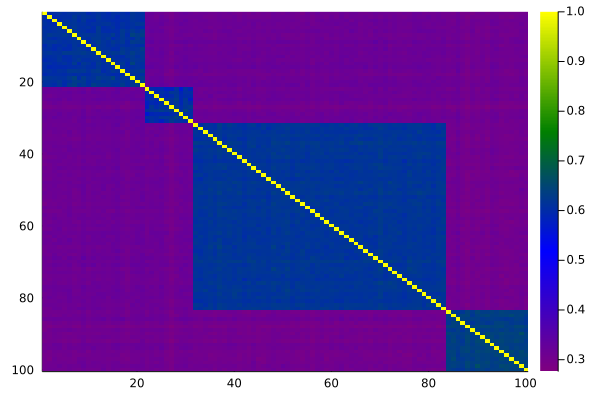

In [15]:
correlation = randomBlockCorrelation(100, 4)
heatmap(Matrix(correlation), c = cgrad([:purple, :blue, :green, :yellow]), yflip = true)

In [6]:
N = [20, 40, 80, 160]
iters = collect(1:1000)
M = 2
results = DataFrames.DataFrame(K_per_N = [], Ratio = [])
for n in N
    for k in range(3, step = 3, stop = div(n, 2))
        cls = 0
        for iter in iters
            corr0 = randomBlockCorr(n, k; minBlockSize = M)
            corr, clusters, silh = clusterKMeansTop(corr0, maxNumClusters = nothing, n_init = 10)
            cls += length(keys(clusters))
        end
        ratio = cls/k
        push!(results, [k/n, ratio])
    end
end
CSV.write("Data.csv", results)

"Data_20_10.csv"